### OLS Regression Model

The dataset I'll be using for this project contains loan application data. I'll be using an OLS regression model to determine what factors have a significant impact on the amount of loan a person can be approved for.

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# import dataset
data = pd.read_csv("train.csv")

> The dataset contains some categorical variables so I'll need to convert them into indicator or dummy variables

In [3]:
# choose columns to be converted to indicator variables
headings = ["Gender", "Education", "Property_Area"]

# Create a dictionary with the set of possible responses for each heading in the heading list
indicator_responses ={heading :sorted(list(set(data[heading]))) for heading in headings}

# cycle through the heading and possible responses
for heading, responses in indicator_responses.items():
    
# for each possible response, create a new column then convert indicator variables to binary variables (0,1)
    for response in responses:
        
# make all values in that column 0 by default        
        data[response] = 0
    
# identify the subset of data where the data in the row matches response
# make values in that column 1 if their response matches response in the original column of data
        data[response][data[heading]==response] = 1

<ipython-input-3-2d8b29c2581d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[response][data[heading]==response] = 1


In [4]:
# let's take a quick peak and view the first 5 records
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban
0,LP001003,Male,1,1,Graduate,0,4583,1508.0,128,360,1,Rural,0,1,1,0,1,0,0
1,LP001005,Male,1,0,Graduate,1,3000,0.0,66,360,1,Urban,0,1,1,0,0,0,1
2,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120,360,1,Urban,0,1,0,1,0,0,1
3,LP001008,Male,0,0,Graduate,0,6000,0.0,141,360,1,Urban,0,1,1,0,0,0,1
4,LP001011,Male,1,2,Graduate,1,5417,4196.0,267,360,1,Urban,0,1,1,0,0,0,1


> We already created a full OLS model so I'll import the OLS Class and use it to run the regression analysis for this dataset. 

In [5]:
# let's get the size of the table

data.shape

(493, 19)

> So, the dataset has 493 records and 19 variables (columns). Note that the columns also include the indicator (dummy) variables we'd created earlier.

In [6]:
from regression import Regression

# create an instance of the regression class
reg = Regression()

You created an instance of Stats


In [7]:
reg

In [8]:
# select dependent variable, y_var

y_var = ["LoanAmount"]

# select independent variables, x_var

x_vars = ["Male", "Female", "Married", "Dependents", "Graduate", "Not Graduate", "Self_Employed", "ApplicantIncome",
          "CoapplicantIncome", "Loan_Amount_Term", "Credit_History", "Rural", "Semiurban", "Urban"]

# now, let's call an instance of the OLS function which is part of the regression class

reg.OLS(reg_name = "LoanAmount", data = data, y_name = y_var, beta_names = x_vars)

C:\Users\0\desktop\econ_611\jupyter\Homework\Home Work 5\regression.py:163: RuntimeWarning: invalid value encountered in double_scalars
  results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)
C:\Users\0\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\0\desktop\econ_611\jupyter\Homework\Home Work 5\regression.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  results.loc[var]["t-stat"] = results["Coefficient"][var] / results["SE"][var]


In [9]:
# Now let's pass the dataset through the regression script. Notice that it now creates an extra column for constants.  
# The last column labeled ...estimator  as well as the Column of ones which is the constant

reg.data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Female,Male,Graduate,Not Graduate,Rural,Semiurban,Urban,Constant,LoanAmountestimator
0,LP001003,Male,1,1,Graduate,0,4583,1508.0,128,360,...,Rural,0,1,1,0,1,0,0,1,-1417.801568
1,LP001005,Male,1,0,Graduate,1,3000,0.0,66,360,...,Urban,0,1,1,0,0,0,1,1,1575.783035
2,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120,360,...,Urban,0,1,0,1,0,0,1,1,1638.462614
3,LP001008,Male,0,0,Graduate,0,6000,0.0,141,360,...,Urban,0,1,1,0,0,0,1,1,2168.721053
4,LP001011,Male,1,2,Graduate,1,5417,4196.0,267,360,...,Urban,0,1,1,0,0,0,1,1,1644.543486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,LP002978,Female,0,0,Graduate,0,2900,0.0,71,360,...,Rural,1,0,1,0,1,0,0,1,-1964.216759
489,LP002979,Male,1,3,Graduate,0,4106,0.0,40,180,...,Rural,0,1,1,0,1,0,0,1,-1408.974742
490,LP002983,Male,1,1,Graduate,0,8072,240.0,253,360,...,Urban,0,1,1,0,0,0,1,1,1683.695466
491,LP002984,Male,1,2,Graduate,0,7583,0.0,187,360,...,Urban,0,1,1,0,0,0,1,1,1675.583169


In [10]:
# now let's get our estimates

reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = LoanAmount,,,,,
Male,1.194698e+18,6.495063e+09,1.839394e+08,0.00000,***
Female,1.194698e+18,4.861883e+09,2.457274e+08,0.00000,***
Married,-5.810676e+02,1.676083e+02,-3.466819e+00,0.00057,***
Dependents,-1.305555e+01,7.563981e+01,-1.726015e-01,0.86304,
Graduate,-1.194698e+18,NaN,NaN,NaN,
Not Graduate,-1.194698e+18,4.484860e+09,-2.663846e+08,0.00000,***
Self_Employed,-4.519175e+01,2.044873e+02,-2.210002e-01,0.82519,
ApplicantIncome,1.191542e-02,1.216118e-02,9.797919e-01,0.32768,
CoapplicantIncome,9.523563e-03,2.795897e-02,3.406264e-01,0.73353,


We see that Gender, marital status and non graduates have a p-value less than 0.01. Which means these variables are statistically significant. Every other variable in the model has a higher than 0.05 p-value which indicates they may not be significant in this model. However, removing a few more variables from the model (say, non indicator variables) might yield a different output. Let's redefine our x and y vars and rerun the model to see if we'll have a different outcome.  

In [11]:
y_var = ["LoanAmount"]

# select independent variables, x_var

x_vars = ["Dependents", "ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term"]

reg.OLS(reg_name = "LoanAmount", data = data, y_name = y_var, beta_names = x_vars)

In [12]:
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = LoanAmount,,,,,
Dependents,10.026218,2.977923,3.366849,0.00082,***
ApplicantIncome,0.007793,0.000507,15.372252,0.00000,***
CoapplicantIncome,0.007742,0.001167,6.632742,0.00000,***
Loan_Amount_Term,0.083146,0.046611,1.783822,0.07507,
Constant,55.068144,16.938254,3.251111,0.00123,**


> Now we have a much cleaner output. ApplicantIncome, CoapplicantIncome and number of dependents are statistically significant in determining the loan amount.

In [13]:
# finally, let's view the various stats

reg.stats_DF.to_csv("regResults.csv")
reg.stats_DF

,Estimation Statistics
r**2,3.769308e-01
adj r**2,3.718341e-01
f-stat,7.395612e+01
Est Var,4.451767e+03
rootMSE,6.672156e+01
SSE,2.176914e+06
SSR,1.316942e+06
SST,3.493856e+06
Obs.,4.940000e+02
DOF,4.890000e+02


The regression model has an $R^2$ of 0.3769 which means about 38% of changes in the dependent variable Y_var, is explained by changes in the independent variables, x_vars. We can improve this mode by re-evualuating x_vars. 

In [14]:
# now let's visualize the regression results

def plot_scatter_with_estimator(title, data, x_vars, y_var):  
    # set default font size  
    plt.rcParams.update({"font.size": 19})  
    # use a for loop to call each exogenous variable  
    y = y_var[0]  
    for x in x_vars:  
        # prepare a figure with the predictor. We will use ax to specify that  
        # the plots are in the same figure  
        fig, ax = plt.subplots(figsize = (12, 8))  
        # labels will be in a legend  
        y_label1 = "Estimate"  
        y_label2 = "Observation"  
        # plot the estimated value  
        data.plot.scatter(x = x, y = y + "estimator", ax = ax, c = "r",
                          s = 10, label = y_label1, legend = False)  
        # erase the y-axis label so that "estimator" is not present  
        # the y-label will reappear when the observations are plotted  
        plt.ylabel("")  
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, label = y_label2,  
                          legend = False)  
        # call the legend, place atop the image on the left  
        # bbox_to_anchor used to specify exact placement of label  
        plt.legend(loc = "upper left", labels = [y_label1, y_label2],   
                   bbox_to_anchor = (0, 1.17)) 
        
#        plt.title("Observations and\nOLS Estimates")
        plt.title(title)
        
        # remove lines marking units on the axis  
        ax.xaxis.set_ticks_position('none')  
        ax.yaxis.set_ticks_position('none')  
        plt.show()  
        plt.close() 

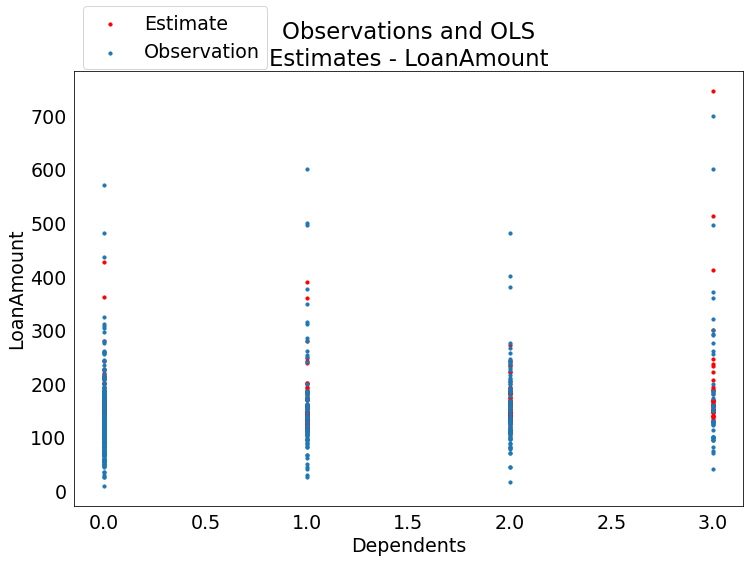

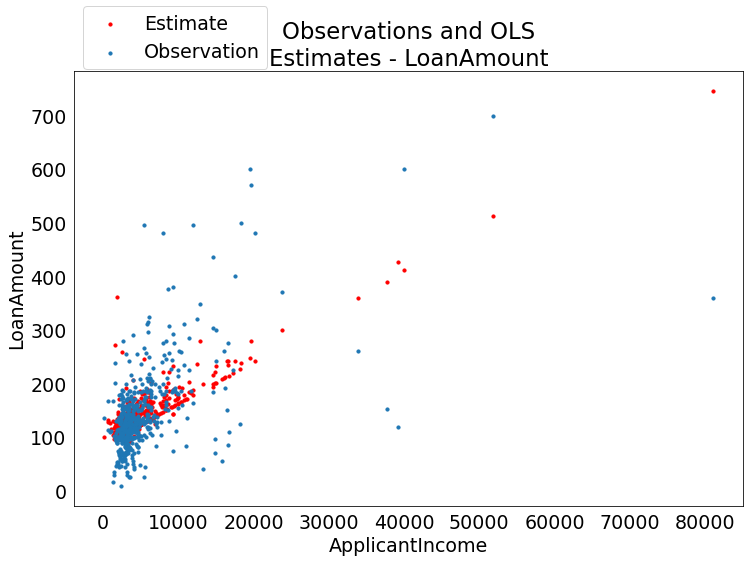

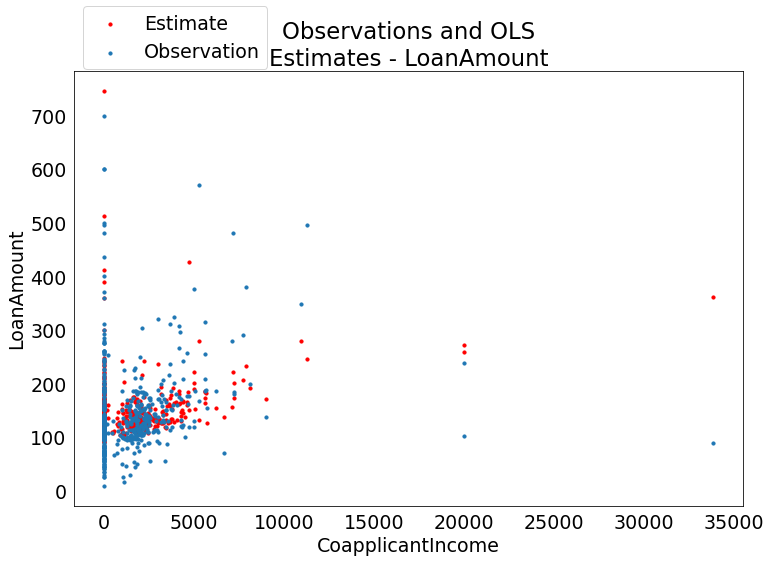

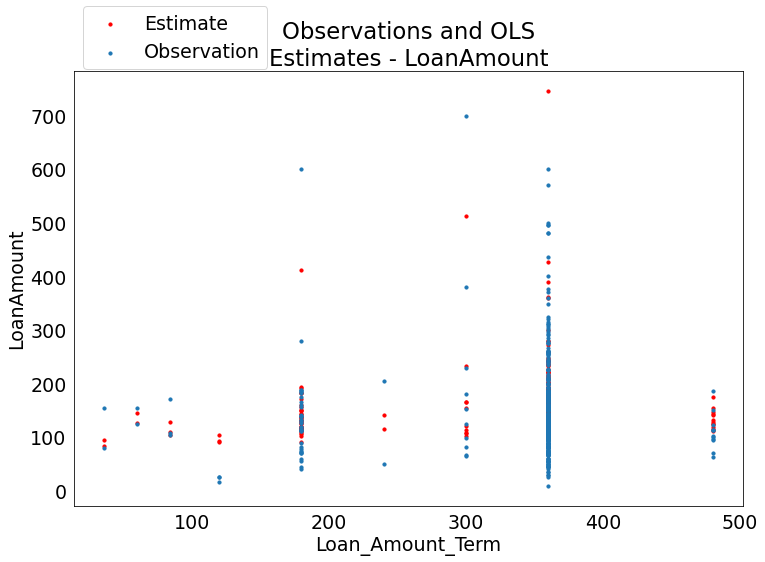

In [15]:
y_var = ["LoanAmount"]

x_vars = ["Dependents", "ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term"]

reg.OLS(reg_name = "LoanAmount", data = data, y_name = y_var, beta_names = x_vars)
reg_name = "LoanAmount"

plot_scatter_with_estimator("Observations and OLS\nEstimates - LoanAmount", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var)


Use the numpy libraries log function to log some or all value in your data. Print the columns of data that have been logged. (hint: pass the appropriate list of keys to the dataframe, data[[key1,key2,key3…]])

In [16]:
# now let's rerun the regression model after logging the applicantincome column.
# log transformation is a convenient means of transforming a skewed variable into a more normalized dataset. 
# since this is nota a time series dataset, we won't be able to calculate pct_change(). 

import numpy as np

data["LoanAmount"] = np.log(data["LoanAmount"])
data["LoanAmount"]



0      4.852030
1      4.189655
2      4.787492
3      4.948760
4      5.587249
         ...   
488    4.262680
489    3.688879
490    5.533389
491    5.231109
492    4.890349
Name: LoanAmount, Length: 493, dtype: float64

In [17]:
y_var = ["LoanAmount"]

# select independent variables, x_var

x_vars = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]

#data[x_vars]
reg.OLS(reg_name = "LoanAmount", data = data, y_name = y_var, beta_names = x_vars)

In [18]:
# now let's rerun the regression again. 

reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = LoanAmount,,,,,
Dependents,0.064589,0.019683,3.281396,0.00111,**
ApplicantIncome,0.000037,0.000003,10.979430,0.00000,***
CoapplicantIncome,0.000050,0.000008,6.473572,0.00000,***
Loan_Amount_Term,0.000917,0.000308,2.977675,0.00305,**
Constant,4.210797,0.111958,37.610402,0.00000,***


In [19]:
reg.stats_DF

,Estimation Statistics
r**2,0.268166
adj r**2,0.262179
f-stat,44.796019
Est Var,0.194495
rootMSE,0.441016
SSE,95.107912
SSR,34.850355
SST,129.958266
Obs.,494.000000
DOF,489.000000


> After logging the ApplicantIncome column, we see that $R^2$ has changed from 38% to 27%. We also notice a significant change in the x_vars coefficients. 

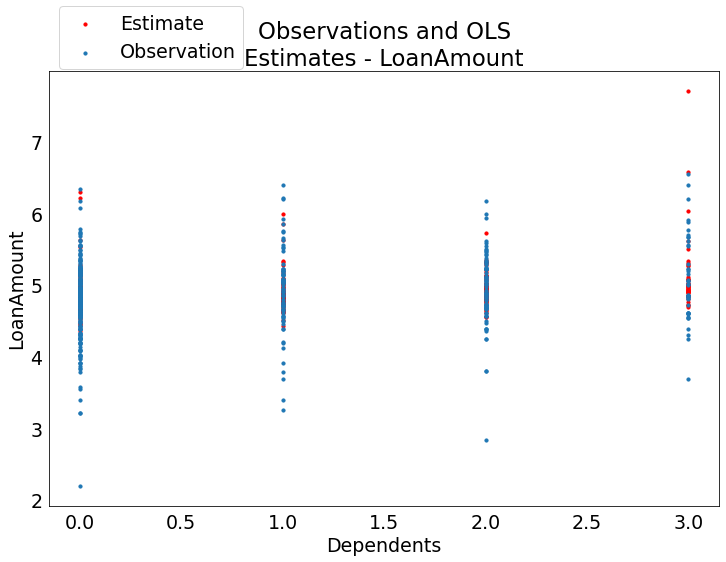

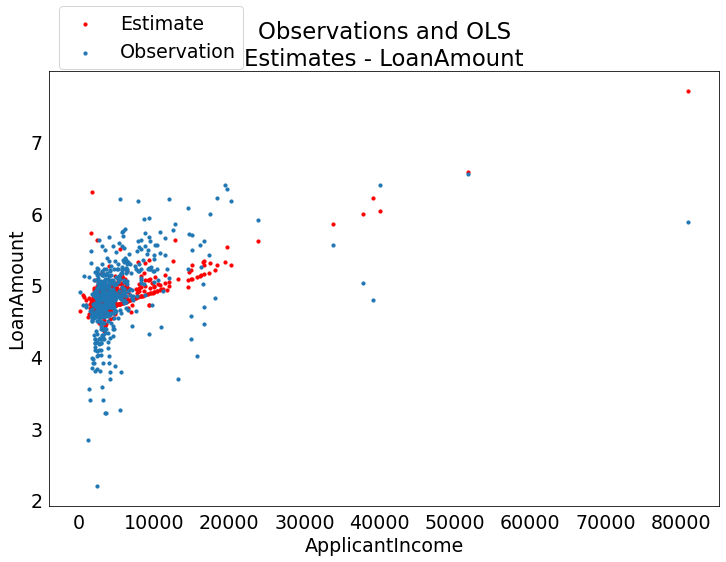

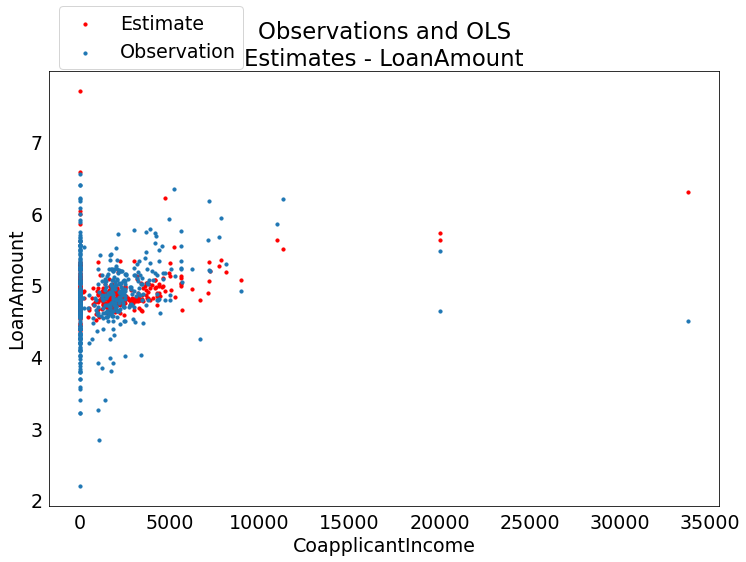

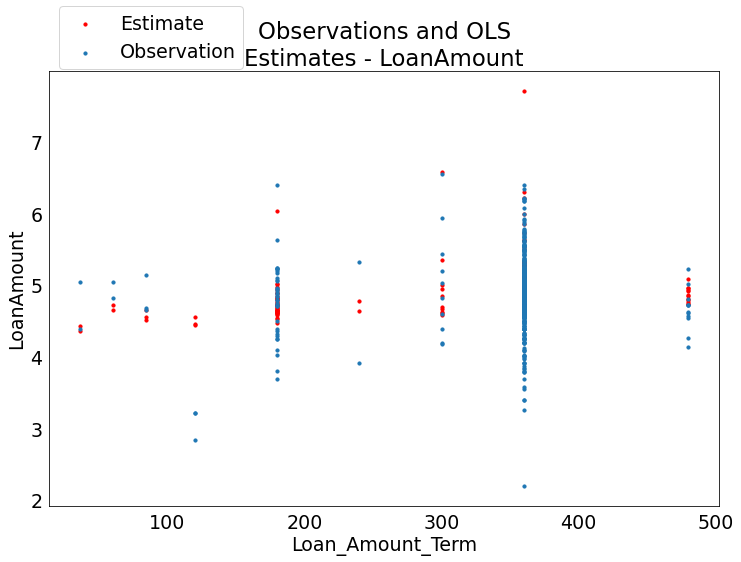

In [20]:
y_var = ["LoanAmount"]

x_vars = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]

reg.OLS(reg_name = "LoanAmount", data = data, y_name = y_var, beta_names = x_vars)
reg_name = "LoanAmount"

plot_scatter_with_estimator("Observations and OLS\nEstimates - LoanAmount", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var)

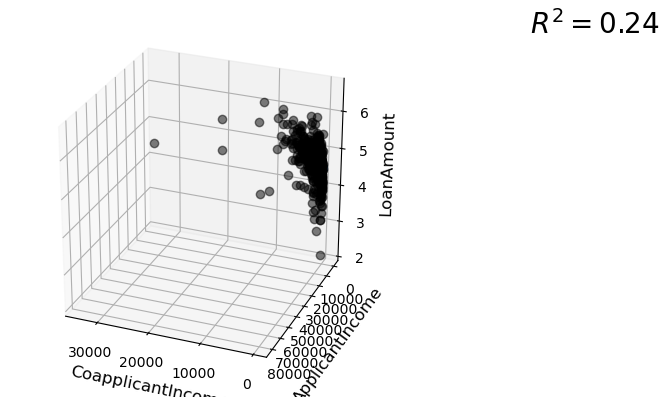

In [37]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


# select x and y vars 
X = data[["CoapplicantIncome", "ApplicantIncome"]].values.reshape(-1, 2)
Y = data["LoanAmount"]

# prepare model data point for visualization
x = X[:, 0]
y = X[:, 1]
z = Y

# range/sequence of CoapplicantIncome values
x_pred = np.linspace(6, 24, 30)

# range/sequence of ApplicantIncome values
y_pred = np.linspace(0.93, 2.9, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# train model
ols = linear_model.LinearRegression()
model = ols.fit(X,Y)
predicted = model.predict(model_viz)

# get value of R**2
r2 = model.score(X, Y)

# create 3d plot
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
# ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('CoapplicantIncome', fontsize=12)
    ax.set_ylabel('ApplicantIncome', fontsize=12)
    ax.set_zlabel('LoanAmount', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, '3Dregplot', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, '3Dregplot', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, '3Dregplot', fontsize=13, ha='center', va='center',
#           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [40]:
for ii in np.arange(0, 360, 1):
    frames = ax.view_init(elev=32, azim=ii)
    #fig.savefig('gif_image%d.png' % ii)
